# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/siyuan/venv/ml/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

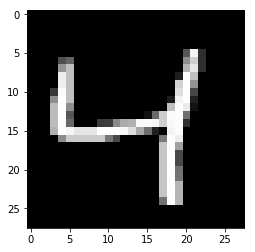

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [23]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 4 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="input")
targets_ = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="output")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, mnist.train.images.shape[1])
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [24]:
mnist.train.images.shape

(60000, 784)

## Training

In [25]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [26]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6927
Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6817
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6764
Epoch: 1/20... Training loss: 0.6746
Epoch: 1/20... Training loss: 0.6726
Epoch: 1/20... Training loss: 0.6694
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6640
Epoch: 1/20... Training loss: 0.6603
Epoch: 1/20... Training loss: 0.6559
Epoch: 1/20... Training loss: 0.6516
Epoch: 1/20... Training loss: 0.6468
Epoch: 1/20... Training loss: 0.6421
E

Epoch: 1/20... Training loss: 0.2721
Epoch: 1/20... Training loss: 0.2667
Epoch: 1/20... Training loss: 0.2714
Epoch: 1/20... Training loss: 0.2678
Epoch: 1/20... Training loss: 0.2702
Epoch: 1/20... Training loss: 0.2654
Epoch: 1/20... Training loss: 0.2692
Epoch: 1/20... Training loss: 0.2710
Epoch: 1/20... Training loss: 0.2689
Epoch: 1/20... Training loss: 0.2765
Epoch: 1/20... Training loss: 0.2714
Epoch: 1/20... Training loss: 0.2680
Epoch: 1/20... Training loss: 0.2708
Epoch: 1/20... Training loss: 0.2670
Epoch: 1/20... Training loss: 0.2603
Epoch: 1/20... Training loss: 0.2672
Epoch: 1/20... Training loss: 0.2669
Epoch: 1/20... Training loss: 0.2774
Epoch: 1/20... Training loss: 0.2649
Epoch: 1/20... Training loss: 0.2653
Epoch: 1/20... Training loss: 0.2706
Epoch: 1/20... Training loss: 0.2623
Epoch: 1/20... Training loss: 0.2706
Epoch: 1/20... Training loss: 0.2705
Epoch: 1/20... Training loss: 0.2712
Epoch: 1/20... Training loss: 0.2679
Epoch: 1/20... Training loss: 0.2668
E

Epoch: 2/20... Training loss: 0.2356
Epoch: 2/20... Training loss: 0.2280
Epoch: 2/20... Training loss: 0.2366
Epoch: 2/20... Training loss: 0.2326
Epoch: 2/20... Training loss: 0.2368
Epoch: 2/20... Training loss: 0.2365
Epoch: 2/20... Training loss: 0.2355
Epoch: 2/20... Training loss: 0.2436
Epoch: 2/20... Training loss: 0.2335
Epoch: 2/20... Training loss: 0.2377
Epoch: 2/20... Training loss: 0.2318
Epoch: 2/20... Training loss: 0.2368
Epoch: 2/20... Training loss: 0.2301
Epoch: 2/20... Training loss: 0.2320
Epoch: 2/20... Training loss: 0.2370
Epoch: 2/20... Training loss: 0.2387
Epoch: 2/20... Training loss: 0.2339
Epoch: 2/20... Training loss: 0.2331
Epoch: 2/20... Training loss: 0.2351
Epoch: 2/20... Training loss: 0.2416
Epoch: 2/20... Training loss: 0.2364
Epoch: 2/20... Training loss: 0.2294
Epoch: 2/20... Training loss: 0.2322
Epoch: 2/20... Training loss: 0.2327
Epoch: 2/20... Training loss: 0.2385
Epoch: 2/20... Training loss: 0.2357
Epoch: 2/20... Training loss: 0.2355
E

Epoch: 3/20... Training loss: 0.2180
Epoch: 3/20... Training loss: 0.2246
Epoch: 3/20... Training loss: 0.2208
Epoch: 3/20... Training loss: 0.2235
Epoch: 3/20... Training loss: 0.2160
Epoch: 3/20... Training loss: 0.2157
Epoch: 3/20... Training loss: 0.2138
Epoch: 3/20... Training loss: 0.2270
Epoch: 3/20... Training loss: 0.2198
Epoch: 3/20... Training loss: 0.2247
Epoch: 3/20... Training loss: 0.2170
Epoch: 3/20... Training loss: 0.2262
Epoch: 3/20... Training loss: 0.2133
Epoch: 3/20... Training loss: 0.2198
Epoch: 3/20... Training loss: 0.2227
Epoch: 3/20... Training loss: 0.2251
Epoch: 3/20... Training loss: 0.2185
Epoch: 3/20... Training loss: 0.2179
Epoch: 3/20... Training loss: 0.2193
Epoch: 3/20... Training loss: 0.2234
Epoch: 3/20... Training loss: 0.2183
Epoch: 3/20... Training loss: 0.2222
Epoch: 3/20... Training loss: 0.2249
Epoch: 3/20... Training loss: 0.2188
Epoch: 3/20... Training loss: 0.2232
Epoch: 3/20... Training loss: 0.2208
Epoch: 3/20... Training loss: 0.2239
E

Epoch: 4/20... Training loss: 0.2155
Epoch: 4/20... Training loss: 0.2151
Epoch: 4/20... Training loss: 0.2197
Epoch: 4/20... Training loss: 0.2164
Epoch: 4/20... Training loss: 0.2198
Epoch: 4/20... Training loss: 0.2167
Epoch: 4/20... Training loss: 0.2173
Epoch: 4/20... Training loss: 0.2131
Epoch: 4/20... Training loss: 0.2240
Epoch: 4/20... Training loss: 0.2195
Epoch: 4/20... Training loss: 0.2159
Epoch: 4/20... Training loss: 0.2172
Epoch: 4/20... Training loss: 0.2174
Epoch: 4/20... Training loss: 0.2136
Epoch: 4/20... Training loss: 0.2179
Epoch: 4/20... Training loss: 0.2160
Epoch: 4/20... Training loss: 0.2159
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2190
Epoch: 4/20... Training loss: 0.2200
Epoch: 4/20... Training loss: 0.2183
Epoch: 4/20... Training loss: 0.2162
Epoch: 4/20... Training loss: 0.2126
Epoch: 4/20... Training loss: 0.2189
Epoch: 4/20... Training loss: 0.2168
Epoch: 4/20... Training loss: 0.2168
Epoch: 4/20... Training loss: 0.2208
E

Epoch: 5/20... Training loss: 0.2155
Epoch: 5/20... Training loss: 0.2089
Epoch: 5/20... Training loss: 0.2117
Epoch: 5/20... Training loss: 0.2038
Epoch: 5/20... Training loss: 0.2124
Epoch: 5/20... Training loss: 0.2134
Epoch: 5/20... Training loss: 0.2196
Epoch: 5/20... Training loss: 0.2207
Epoch: 5/20... Training loss: 0.2175
Epoch: 5/20... Training loss: 0.2151
Epoch: 5/20... Training loss: 0.2145
Epoch: 5/20... Training loss: 0.2127
Epoch: 5/20... Training loss: 0.2052
Epoch: 5/20... Training loss: 0.2094
Epoch: 5/20... Training loss: 0.2103
Epoch: 5/20... Training loss: 0.2156
Epoch: 5/20... Training loss: 0.2185
Epoch: 5/20... Training loss: 0.2062
Epoch: 5/20... Training loss: 0.2196
Epoch: 5/20... Training loss: 0.2167
Epoch: 5/20... Training loss: 0.2143
Epoch: 5/20... Training loss: 0.2165
Epoch: 5/20... Training loss: 0.2142
Epoch: 5/20... Training loss: 0.2178
Epoch: 5/20... Training loss: 0.2179
Epoch: 5/20... Training loss: 0.2134
Epoch: 5/20... Training loss: 0.2222
E

Epoch: 5/20... Training loss: 0.2161
Epoch: 6/20... Training loss: 0.2074
Epoch: 6/20... Training loss: 0.2149
Epoch: 6/20... Training loss: 0.2080
Epoch: 6/20... Training loss: 0.2143
Epoch: 6/20... Training loss: 0.2122
Epoch: 6/20... Training loss: 0.2124
Epoch: 6/20... Training loss: 0.2095
Epoch: 6/20... Training loss: 0.2124
Epoch: 6/20... Training loss: 0.2076
Epoch: 6/20... Training loss: 0.2094
Epoch: 6/20... Training loss: 0.2116
Epoch: 6/20... Training loss: 0.2042
Epoch: 6/20... Training loss: 0.2178
Epoch: 6/20... Training loss: 0.2102
Epoch: 6/20... Training loss: 0.2056
Epoch: 6/20... Training loss: 0.2061
Epoch: 6/20... Training loss: 0.2114
Epoch: 6/20... Training loss: 0.2081
Epoch: 6/20... Training loss: 0.2058
Epoch: 6/20... Training loss: 0.2185
Epoch: 6/20... Training loss: 0.2102
Epoch: 6/20... Training loss: 0.2149
Epoch: 6/20... Training loss: 0.2065
Epoch: 6/20... Training loss: 0.2098
Epoch: 6/20... Training loss: 0.2136
Epoch: 6/20... Training loss: 0.2051
E

Epoch: 6/20... Training loss: 0.2163
Epoch: 6/20... Training loss: 0.2095
Epoch: 6/20... Training loss: 0.2178
Epoch: 6/20... Training loss: 0.2093
Epoch: 6/20... Training loss: 0.2111
Epoch: 6/20... Training loss: 0.2175
Epoch: 6/20... Training loss: 0.2072
Epoch: 6/20... Training loss: 0.2056
Epoch: 6/20... Training loss: 0.2103
Epoch: 6/20... Training loss: 0.2117
Epoch: 6/20... Training loss: 0.2115
Epoch: 6/20... Training loss: 0.2121
Epoch: 6/20... Training loss: 0.2074
Epoch: 6/20... Training loss: 0.2113
Epoch: 6/20... Training loss: 0.2161
Epoch: 6/20... Training loss: 0.2078
Epoch: 6/20... Training loss: 0.2130
Epoch: 6/20... Training loss: 0.2083
Epoch: 6/20... Training loss: 0.2071
Epoch: 6/20... Training loss: 0.2124
Epoch: 6/20... Training loss: 0.2106
Epoch: 6/20... Training loss: 0.2140
Epoch: 6/20... Training loss: 0.2091
Epoch: 6/20... Training loss: 0.2103
Epoch: 6/20... Training loss: 0.2120
Epoch: 6/20... Training loss: 0.2059
Epoch: 6/20... Training loss: 0.2130
E

Epoch: 7/20... Training loss: 0.2176
Epoch: 7/20... Training loss: 0.2104
Epoch: 7/20... Training loss: 0.2062
Epoch: 7/20... Training loss: 0.2075
Epoch: 7/20... Training loss: 0.2062
Epoch: 7/20... Training loss: 0.2231
Epoch: 7/20... Training loss: 0.2096
Epoch: 7/20... Training loss: 0.2062
Epoch: 7/20... Training loss: 0.2095
Epoch: 7/20... Training loss: 0.2130
Epoch: 7/20... Training loss: 0.2028
Epoch: 7/20... Training loss: 0.2100
Epoch: 7/20... Training loss: 0.2071
Epoch: 7/20... Training loss: 0.2083
Epoch: 7/20... Training loss: 0.2098
Epoch: 7/20... Training loss: 0.2134
Epoch: 7/20... Training loss: 0.2039
Epoch: 7/20... Training loss: 0.2103
Epoch: 7/20... Training loss: 0.2173
Epoch: 7/20... Training loss: 0.2140
Epoch: 7/20... Training loss: 0.2075
Epoch: 7/20... Training loss: 0.2091
Epoch: 7/20... Training loss: 0.2079
Epoch: 7/20... Training loss: 0.2193
Epoch: 7/20... Training loss: 0.2108
Epoch: 7/20... Training loss: 0.2112
Epoch: 7/20... Training loss: 0.2082
E

Epoch: 8/20... Training loss: 0.2091
Epoch: 8/20... Training loss: 0.2051
Epoch: 8/20... Training loss: 0.2077
Epoch: 8/20... Training loss: 0.2143
Epoch: 8/20... Training loss: 0.2132
Epoch: 8/20... Training loss: 0.2162
Epoch: 8/20... Training loss: 0.2104
Epoch: 8/20... Training loss: 0.2055
Epoch: 8/20... Training loss: 0.2115
Epoch: 8/20... Training loss: 0.2052
Epoch: 8/20... Training loss: 0.2078
Epoch: 8/20... Training loss: 0.2058
Epoch: 8/20... Training loss: 0.2107
Epoch: 8/20... Training loss: 0.2074
Epoch: 8/20... Training loss: 0.2081
Epoch: 8/20... Training loss: 0.2057
Epoch: 8/20... Training loss: 0.2062
Epoch: 8/20... Training loss: 0.2085
Epoch: 8/20... Training loss: 0.2062
Epoch: 8/20... Training loss: 0.2075
Epoch: 8/20... Training loss: 0.2125
Epoch: 8/20... Training loss: 0.2065
Epoch: 8/20... Training loss: 0.2117
Epoch: 8/20... Training loss: 0.2024
Epoch: 8/20... Training loss: 0.2076
Epoch: 8/20... Training loss: 0.2065
Epoch: 8/20... Training loss: 0.2104
E

Epoch: 9/20... Training loss: 0.2096
Epoch: 9/20... Training loss: 0.2102
Epoch: 9/20... Training loss: 0.2069
Epoch: 9/20... Training loss: 0.2114
Epoch: 9/20... Training loss: 0.2128
Epoch: 9/20... Training loss: 0.2116
Epoch: 9/20... Training loss: 0.2087
Epoch: 9/20... Training loss: 0.2099
Epoch: 9/20... Training loss: 0.2085
Epoch: 9/20... Training loss: 0.2123
Epoch: 9/20... Training loss: 0.2082
Epoch: 9/20... Training loss: 0.2088
Epoch: 9/20... Training loss: 0.2134
Epoch: 9/20... Training loss: 0.2103
Epoch: 9/20... Training loss: 0.2104
Epoch: 9/20... Training loss: 0.2050
Epoch: 9/20... Training loss: 0.2067
Epoch: 9/20... Training loss: 0.2075
Epoch: 9/20... Training loss: 0.2027
Epoch: 9/20... Training loss: 0.2081
Epoch: 9/20... Training loss: 0.2117
Epoch: 9/20... Training loss: 0.2094
Epoch: 9/20... Training loss: 0.2048
Epoch: 9/20... Training loss: 0.2078
Epoch: 9/20... Training loss: 0.2065
Epoch: 9/20... Training loss: 0.2068
Epoch: 9/20... Training loss: 0.2106
E

Epoch: 10/20... Training loss: 0.2068
Epoch: 10/20... Training loss: 0.2072
Epoch: 10/20... Training loss: 0.1999
Epoch: 10/20... Training loss: 0.2045
Epoch: 10/20... Training loss: 0.2053
Epoch: 10/20... Training loss: 0.2070
Epoch: 10/20... Training loss: 0.2138
Epoch: 10/20... Training loss: 0.2044
Epoch: 10/20... Training loss: 0.1940
Epoch: 10/20... Training loss: 0.2063
Epoch: 10/20... Training loss: 0.2067
Epoch: 10/20... Training loss: 0.2141
Epoch: 10/20... Training loss: 0.2073
Epoch: 10/20... Training loss: 0.1996
Epoch: 10/20... Training loss: 0.1995
Epoch: 10/20... Training loss: 0.2042
Epoch: 10/20... Training loss: 0.2014
Epoch: 10/20... Training loss: 0.2084
Epoch: 10/20... Training loss: 0.2007
Epoch: 10/20... Training loss: 0.2027
Epoch: 10/20... Training loss: 0.2112
Epoch: 10/20... Training loss: 0.2016
Epoch: 10/20... Training loss: 0.2105
Epoch: 10/20... Training loss: 0.2024
Epoch: 10/20... Training loss: 0.2108
Epoch: 10/20... Training loss: 0.2086
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1980
Epoch: 11/20... Training loss: 0.2067
Epoch: 11/20... Training loss: 0.2038
Epoch: 11/20... Training loss: 0.2166
Epoch: 11/20... Training loss: 0.2030
Epoch: 11/20... Training loss: 0.1985
Epoch: 11/20... Training loss: 0.2095
Epoch: 11/20... Training loss: 0.2106
Epoch: 11/20... Training loss: 0.2067
Epoch: 11/20... Training loss: 0.2046
Epoch: 11/20... Training loss: 0.2052
Epoch: 11/20... Training loss: 0.2067
Epoch: 11/20... Training loss: 0.2028
Epoch: 11/20... Training loss: 0.1972
Epoch: 11/20... Training loss: 0.2057
Epoch: 11/20... Training loss: 0.1980
Epoch: 11/20... Training loss: 0.2044
Epoch: 11/20... Training loss: 0.2115
Epoch: 11/20... Training loss: 0.1991
Epoch: 11/20... Training loss: 0.2021
Epoch: 11/20... Training loss: 0.2100
Epoch: 11/20... Training loss: 0.2033
Epoch: 11/20... Training loss: 0.2089
Epoch: 11/20... Training loss: 0.2097
Epoch: 11/20... Training loss: 0.2044
Epoch: 11/20... Training loss: 0.2071
Epoch: 11/20

Epoch: 11/20... Training loss: 0.2116
Epoch: 11/20... Training loss: 0.2078
Epoch: 11/20... Training loss: 0.2092
Epoch: 11/20... Training loss: 0.2070
Epoch: 11/20... Training loss: 0.2029
Epoch: 11/20... Training loss: 0.2079
Epoch: 11/20... Training loss: 0.2099
Epoch: 11/20... Training loss: 0.2121
Epoch: 11/20... Training loss: 0.2082
Epoch: 11/20... Training loss: 0.2080
Epoch: 11/20... Training loss: 0.1956
Epoch: 11/20... Training loss: 0.2080
Epoch: 11/20... Training loss: 0.2053
Epoch: 11/20... Training loss: 0.2043
Epoch: 11/20... Training loss: 0.2062
Epoch: 11/20... Training loss: 0.1989
Epoch: 11/20... Training loss: 0.2027
Epoch: 11/20... Training loss: 0.2105
Epoch: 11/20... Training loss: 0.2028
Epoch: 11/20... Training loss: 0.2065
Epoch: 11/20... Training loss: 0.2041
Epoch: 11/20... Training loss: 0.2020
Epoch: 11/20... Training loss: 0.2007
Epoch: 11/20... Training loss: 0.2070
Epoch: 11/20... Training loss: 0.2081
Epoch: 11/20... Training loss: 0.2032
Epoch: 11/20

Epoch: 12/20... Training loss: 0.2056
Epoch: 12/20... Training loss: 0.2109
Epoch: 12/20... Training loss: 0.2012
Epoch: 12/20... Training loss: 0.1988
Epoch: 12/20... Training loss: 0.2158
Epoch: 12/20... Training loss: 0.2075
Epoch: 12/20... Training loss: 0.2051
Epoch: 12/20... Training loss: 0.2005
Epoch: 12/20... Training loss: 0.2047
Epoch: 12/20... Training loss: 0.2064
Epoch: 12/20... Training loss: 0.2119
Epoch: 12/20... Training loss: 0.2055
Epoch: 12/20... Training loss: 0.2005
Epoch: 12/20... Training loss: 0.1996
Epoch: 12/20... Training loss: 0.2071
Epoch: 12/20... Training loss: 0.2113
Epoch: 12/20... Training loss: 0.2086
Epoch: 12/20... Training loss: 0.2092
Epoch: 12/20... Training loss: 0.2063
Epoch: 12/20... Training loss: 0.2054
Epoch: 12/20... Training loss: 0.2065
Epoch: 12/20... Training loss: 0.2086
Epoch: 12/20... Training loss: 0.2061
Epoch: 12/20... Training loss: 0.2074
Epoch: 12/20... Training loss: 0.1995
Epoch: 12/20... Training loss: 0.2133
Epoch: 12/20

Epoch: 13/20... Training loss: 0.2045
Epoch: 13/20... Training loss: 0.1992
Epoch: 13/20... Training loss: 0.2050
Epoch: 13/20... Training loss: 0.2055
Epoch: 13/20... Training loss: 0.2086
Epoch: 13/20... Training loss: 0.2071
Epoch: 13/20... Training loss: 0.2106
Epoch: 13/20... Training loss: 0.2039
Epoch: 13/20... Training loss: 0.2043
Epoch: 13/20... Training loss: 0.2019
Epoch: 13/20... Training loss: 0.2124
Epoch: 13/20... Training loss: 0.2055
Epoch: 13/20... Training loss: 0.2020
Epoch: 13/20... Training loss: 0.2105
Epoch: 13/20... Training loss: 0.2062
Epoch: 13/20... Training loss: 0.2041
Epoch: 13/20... Training loss: 0.2120
Epoch: 13/20... Training loss: 0.2072
Epoch: 13/20... Training loss: 0.2044
Epoch: 13/20... Training loss: 0.2101
Epoch: 13/20... Training loss: 0.2049
Epoch: 13/20... Training loss: 0.2026
Epoch: 13/20... Training loss: 0.2057
Epoch: 13/20... Training loss: 0.1996
Epoch: 13/20... Training loss: 0.2054
Epoch: 13/20... Training loss: 0.2001
Epoch: 13/20

Epoch: 14/20... Training loss: 0.2100
Epoch: 14/20... Training loss: 0.2128
Epoch: 14/20... Training loss: 0.2046
Epoch: 14/20... Training loss: 0.2039
Epoch: 14/20... Training loss: 0.2049
Epoch: 14/20... Training loss: 0.2062
Epoch: 14/20... Training loss: 0.2034
Epoch: 14/20... Training loss: 0.2050
Epoch: 14/20... Training loss: 0.2057
Epoch: 14/20... Training loss: 0.2037
Epoch: 14/20... Training loss: 0.2166
Epoch: 14/20... Training loss: 0.2001
Epoch: 14/20... Training loss: 0.2044
Epoch: 14/20... Training loss: 0.2021
Epoch: 14/20... Training loss: 0.2034
Epoch: 14/20... Training loss: 0.2090
Epoch: 14/20... Training loss: 0.2046
Epoch: 14/20... Training loss: 0.2097
Epoch: 14/20... Training loss: 0.2117
Epoch: 14/20... Training loss: 0.2082
Epoch: 14/20... Training loss: 0.2029
Epoch: 14/20... Training loss: 0.2061
Epoch: 14/20... Training loss: 0.2048
Epoch: 14/20... Training loss: 0.2045
Epoch: 14/20... Training loss: 0.2188
Epoch: 14/20... Training loss: 0.2027
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1926
Epoch: 14/20... Training loss: 0.2067
Epoch: 14/20... Training loss: 0.2038
Epoch: 14/20... Training loss: 0.2041
Epoch: 14/20... Training loss: 0.2026
Epoch: 14/20... Training loss: 0.2005
Epoch: 14/20... Training loss: 0.2059
Epoch: 14/20... Training loss: 0.2034
Epoch: 14/20... Training loss: 0.2015
Epoch: 14/20... Training loss: 0.2047
Epoch: 14/20... Training loss: 0.2029
Epoch: 14/20... Training loss: 0.2044
Epoch: 14/20... Training loss: 0.2004
Epoch: 14/20... Training loss: 0.1980
Epoch: 14/20... Training loss: 0.1973
Epoch: 14/20... Training loss: 0.1931
Epoch: 14/20... Training loss: 0.2019
Epoch: 14/20... Training loss: 0.2013
Epoch: 14/20... Training loss: 0.2019
Epoch: 14/20... Training loss: 0.2023
Epoch: 14/20... Training loss: 0.2031
Epoch: 14/20... Training loss: 0.2023
Epoch: 14/20... Training loss: 0.2066
Epoch: 14/20... Training loss: 0.2016
Epoch: 14/20... Training loss: 0.2023
Epoch: 14/20... Training loss: 0.2067
Epoch: 14/20

Epoch: 15/20... Training loss: 0.2037
Epoch: 15/20... Training loss: 0.2028
Epoch: 15/20... Training loss: 0.2018
Epoch: 15/20... Training loss: 0.2051
Epoch: 15/20... Training loss: 0.2042
Epoch: 15/20... Training loss: 0.2111
Epoch: 15/20... Training loss: 0.2004
Epoch: 15/20... Training loss: 0.2066
Epoch: 15/20... Training loss: 0.2072
Epoch: 15/20... Training loss: 0.1997
Epoch: 15/20... Training loss: 0.2042
Epoch: 15/20... Training loss: 0.2001
Epoch: 15/20... Training loss: 0.2009
Epoch: 15/20... Training loss: 0.2028
Epoch: 15/20... Training loss: 0.2010
Epoch: 15/20... Training loss: 0.2009
Epoch: 15/20... Training loss: 0.2037
Epoch: 15/20... Training loss: 0.2055
Epoch: 15/20... Training loss: 0.2084
Epoch: 15/20... Training loss: 0.2066
Epoch: 15/20... Training loss: 0.1947
Epoch: 15/20... Training loss: 0.2090
Epoch: 15/20... Training loss: 0.2060
Epoch: 15/20... Training loss: 0.2021
Epoch: 15/20... Training loss: 0.2069
Epoch: 15/20... Training loss: 0.2097
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1911
Epoch: 16/20... Training loss: 0.1982
Epoch: 16/20... Training loss: 0.2076
Epoch: 16/20... Training loss: 0.2048
Epoch: 16/20... Training loss: 0.2058
Epoch: 16/20... Training loss: 0.1991
Epoch: 16/20... Training loss: 0.1992
Epoch: 16/20... Training loss: 0.2062
Epoch: 16/20... Training loss: 0.2017
Epoch: 16/20... Training loss: 0.2048
Epoch: 16/20... Training loss: 0.2079
Epoch: 16/20... Training loss: 0.2065
Epoch: 16/20... Training loss: 0.1982
Epoch: 16/20... Training loss: 0.2113
Epoch: 16/20... Training loss: 0.1957
Epoch: 16/20... Training loss: 0.2008
Epoch: 16/20... Training loss: 0.2063
Epoch: 16/20... Training loss: 0.2075
Epoch: 16/20... Training loss: 0.2052
Epoch: 16/20... Training loss: 0.2018
Epoch: 16/20... Training loss: 0.2031
Epoch: 16/20... Training loss: 0.1979
Epoch: 16/20... Training loss: 0.2022
Epoch: 16/20... Training loss: 0.2043
Epoch: 16/20... Training loss: 0.2024
Epoch: 16/20... Training loss: 0.2074
Epoch: 16/20

Epoch: 17/20... Training loss: 0.2055
Epoch: 17/20... Training loss: 0.2005
Epoch: 17/20... Training loss: 0.2018
Epoch: 17/20... Training loss: 0.1991
Epoch: 17/20... Training loss: 0.1997
Epoch: 17/20... Training loss: 0.2025
Epoch: 17/20... Training loss: 0.2073
Epoch: 17/20... Training loss: 0.1993
Epoch: 17/20... Training loss: 0.2058
Epoch: 17/20... Training loss: 0.1972
Epoch: 17/20... Training loss: 0.2042
Epoch: 17/20... Training loss: 0.1994
Epoch: 17/20... Training loss: 0.2054
Epoch: 17/20... Training loss: 0.2058
Epoch: 17/20... Training loss: 0.2032
Epoch: 17/20... Training loss: 0.2055
Epoch: 17/20... Training loss: 0.2074
Epoch: 17/20... Training loss: 0.2009
Epoch: 17/20... Training loss: 0.2040
Epoch: 17/20... Training loss: 0.2012
Epoch: 17/20... Training loss: 0.2021
Epoch: 17/20... Training loss: 0.2090
Epoch: 17/20... Training loss: 0.2032
Epoch: 17/20... Training loss: 0.2001
Epoch: 17/20... Training loss: 0.2051
Epoch: 17/20... Training loss: 0.2020
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1967
Epoch: 17/20... Training loss: 0.2094
Epoch: 17/20... Training loss: 0.2043
Epoch: 17/20... Training loss: 0.2049
Epoch: 17/20... Training loss: 0.2036
Epoch: 17/20... Training loss: 0.1999
Epoch: 17/20... Training loss: 0.2046
Epoch: 17/20... Training loss: 0.2054
Epoch: 17/20... Training loss: 0.2018
Epoch: 17/20... Training loss: 0.2022
Epoch: 17/20... Training loss: 0.2055
Epoch: 17/20... Training loss: 0.2002
Epoch: 17/20... Training loss: 0.2054
Epoch: 17/20... Training loss: 0.2054
Epoch: 17/20... Training loss: 0.2000
Epoch: 17/20... Training loss: 0.2009
Epoch: 17/20... Training loss: 0.1990
Epoch: 17/20... Training loss: 0.1964
Epoch: 17/20... Training loss: 0.2072
Epoch: 17/20... Training loss: 0.1992
Epoch: 17/20... Training loss: 0.2056
Epoch: 17/20... Training loss: 0.1991
Epoch: 17/20... Training loss: 0.2015
Epoch: 17/20... Training loss: 0.2046
Epoch: 17/20... Training loss: 0.2027
Epoch: 17/20... Training loss: 0.2005
Epoch: 17/20

Epoch: 18/20... Training loss: 0.2021
Epoch: 18/20... Training loss: 0.1971
Epoch: 18/20... Training loss: 0.2056
Epoch: 18/20... Training loss: 0.2099
Epoch: 18/20... Training loss: 0.1994
Epoch: 18/20... Training loss: 0.2013
Epoch: 18/20... Training loss: 0.2048
Epoch: 18/20... Training loss: 0.1996
Epoch: 18/20... Training loss: 0.2035
Epoch: 18/20... Training loss: 0.2030
Epoch: 18/20... Training loss: 0.1983
Epoch: 18/20... Training loss: 0.2013
Epoch: 18/20... Training loss: 0.2049
Epoch: 18/20... Training loss: 0.2037
Epoch: 18/20... Training loss: 0.2037
Epoch: 18/20... Training loss: 0.1950
Epoch: 18/20... Training loss: 0.2028
Epoch: 18/20... Training loss: 0.2001
Epoch: 18/20... Training loss: 0.2046
Epoch: 18/20... Training loss: 0.2002
Epoch: 18/20... Training loss: 0.2075
Epoch: 18/20... Training loss: 0.2067
Epoch: 18/20... Training loss: 0.2027
Epoch: 18/20... Training loss: 0.2069
Epoch: 18/20... Training loss: 0.2050
Epoch: 18/20... Training loss: 0.1972
Epoch: 18/20

Epoch: 19/20... Training loss: 0.2053
Epoch: 19/20... Training loss: 0.2004
Epoch: 19/20... Training loss: 0.2041
Epoch: 19/20... Training loss: 0.2048
Epoch: 19/20... Training loss: 0.1960
Epoch: 19/20... Training loss: 0.2021
Epoch: 19/20... Training loss: 0.1961
Epoch: 19/20... Training loss: 0.2050
Epoch: 19/20... Training loss: 0.2025
Epoch: 19/20... Training loss: 0.2018
Epoch: 19/20... Training loss: 0.2067
Epoch: 19/20... Training loss: 0.2011
Epoch: 19/20... Training loss: 0.2014
Epoch: 19/20... Training loss: 0.2033
Epoch: 19/20... Training loss: 0.2009
Epoch: 19/20... Training loss: 0.2053
Epoch: 19/20... Training loss: 0.2094
Epoch: 19/20... Training loss: 0.2065
Epoch: 19/20... Training loss: 0.1989
Epoch: 19/20... Training loss: 0.1960
Epoch: 19/20... Training loss: 0.1958
Epoch: 19/20... Training loss: 0.2030
Epoch: 19/20... Training loss: 0.2035
Epoch: 19/20... Training loss: 0.2007
Epoch: 19/20... Training loss: 0.1989
Epoch: 19/20... Training loss: 0.2052
Epoch: 19/20

Epoch: 20/20... Training loss: 0.2001
Epoch: 20/20... Training loss: 0.1936
Epoch: 20/20... Training loss: 0.2028
Epoch: 20/20... Training loss: 0.2010
Epoch: 20/20... Training loss: 0.2112
Epoch: 20/20... Training loss: 0.1960
Epoch: 20/20... Training loss: 0.1978
Epoch: 20/20... Training loss: 0.2020
Epoch: 20/20... Training loss: 0.2001
Epoch: 20/20... Training loss: 0.1978
Epoch: 20/20... Training loss: 0.2014
Epoch: 20/20... Training loss: 0.2051
Epoch: 20/20... Training loss: 0.1979
Epoch: 20/20... Training loss: 0.2032
Epoch: 20/20... Training loss: 0.2019
Epoch: 20/20... Training loss: 0.2065
Epoch: 20/20... Training loss: 0.2030
Epoch: 20/20... Training loss: 0.2002
Epoch: 20/20... Training loss: 0.2010
Epoch: 20/20... Training loss: 0.2099
Epoch: 20/20... Training loss: 0.2018
Epoch: 20/20... Training loss: 0.2000
Epoch: 20/20... Training loss: 0.2041
Epoch: 20/20... Training loss: 0.2067
Epoch: 20/20... Training loss: 0.2061
Epoch: 20/20... Training loss: 0.2061
Epoch: 20/20

Epoch: 20/20... Training loss: 0.2066
Epoch: 20/20... Training loss: 0.2062
Epoch: 20/20... Training loss: 0.1960
Epoch: 20/20... Training loss: 0.2019
Epoch: 20/20... Training loss: 0.2032
Epoch: 20/20... Training loss: 0.1995
Epoch: 20/20... Training loss: 0.2040
Epoch: 20/20... Training loss: 0.1943
Epoch: 20/20... Training loss: 0.2047
Epoch: 20/20... Training loss: 0.2015
Epoch: 20/20... Training loss: 0.2009
Epoch: 20/20... Training loss: 0.1986
Epoch: 20/20... Training loss: 0.1981
Epoch: 20/20... Training loss: 0.2038
Epoch: 20/20... Training loss: 0.2037
Epoch: 20/20... Training loss: 0.2043
Epoch: 20/20... Training loss: 0.2036
Epoch: 20/20... Training loss: 0.1998
Epoch: 20/20... Training loss: 0.2033
Epoch: 20/20... Training loss: 0.2010
Epoch: 20/20... Training loss: 0.1972
Epoch: 20/20... Training loss: 0.2038
Epoch: 20/20... Training loss: 0.2021
Epoch: 20/20... Training loss: 0.2003
Epoch: 20/20... Training loss: 0.2055
Epoch: 20/20... Training loss: 0.1990
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

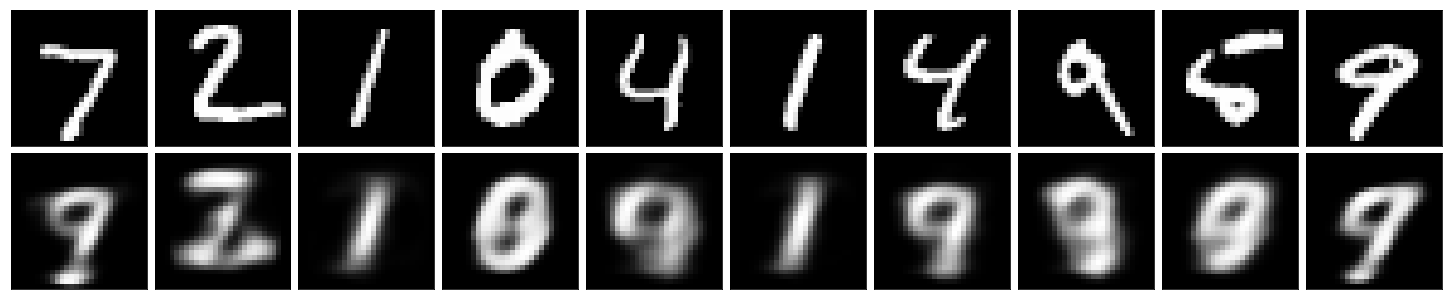

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [28]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.